# Disk Plots

This notebook shows how to produce top-down view plots of the disk.

We will reuse the data from the `100_quickstart` example.
Let's make sure it existst.

In [1]:
example_name = "100_quickstart"
example_dir = f"example_dirs/{example_name}"
import os
if not os.path.basename(os.getcwd()) == example_name:
    if os.path.exists(example_dir):
        os.chdir(example_dir)
        if not os.path.exists("output/out/snapshots/list.txt"):
            raise FileNotFoundError(f"No snapshots found. Please run the simulation inside the 100_Quickstart.ipynb notebook first!")
    else:
        raise FileNotFoundError(f"Please go through the 100_Quickstart.ipynb notebook first!")

repo_root = os.path.abspath(os.path.join(os.getcwd(), "../../../"))
print(f"Current working directory: {os.getcwd()}")
print(f"Repository root directory: {repo_root}")


Current working directory: /home/rometsch/repo/fargocpt/examples/example_dirs/100_quickstart
Repository root directory: /home/rometsch/repo/fargocpt


## Plotting fields

The data is present in polar ($r-\varphi$) coordinates.
To plot the disk as a circular object, we can calculate the coordinates in cartesian coordinates and then use `pcolormesh` from `matplotlib`.

Below is a function to plot a field from the simulation output in such a way.

In [2]:
import numpy as np
import matplotlib.colors as mplcolors
import matplotlib.pyplot as plt

def plot_field(loader, name, N, ax=None, dataunit=None, vmin=None, vmax=None, cmap="viridis", title=None):
    R, PHI, vals = loader.gas.vars2D.get(name, N, grid_for_plot=True)
    if dataunit is None:
        dataunit = vals.unit
    C = vals.to_value(dataunit)

    X = R*np.cos(PHI)
    Y = R*np.sin(PHI)

    if ax is None:
        fig, ax = plt.subplots(dpi=150)
    else:
        fig = ax.get_figure()

    norm = mplcolors.Normalize(vmin=vmin, vmax=vmax)

    # Hacky way to support arrays that are defined on the radial interfaces
    if C.shape[0] == X.shape[0]:
        C = C[:-1,:]

    pcm = ax.pcolormesh(X,Y,C, norm=norm, cmap=cmap)
    ax.set_aspect("equal")

    t = loader.snapshot_time[N].to_value("kyr")
    if title is None:
        title = ""
    else:
        title += "\n"
    title += f" t={t:.2e}kyr, N={N}"
    ax.set_title(title)

    cbar = fig.colorbar(pcm, ax=ax)
    cbar.set_label(f"{name} [{dataunit}]")
    
    return fig

Now, let's plot some fields.

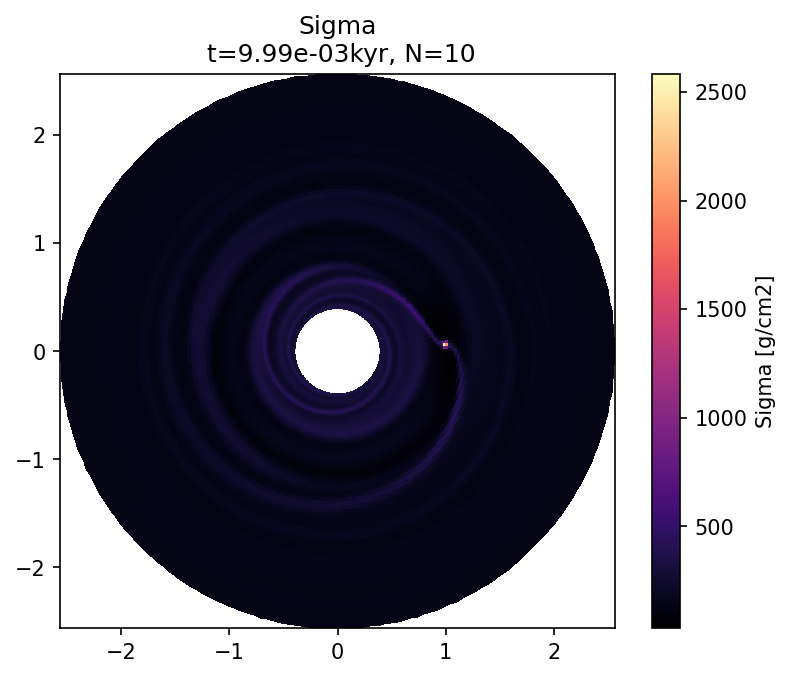

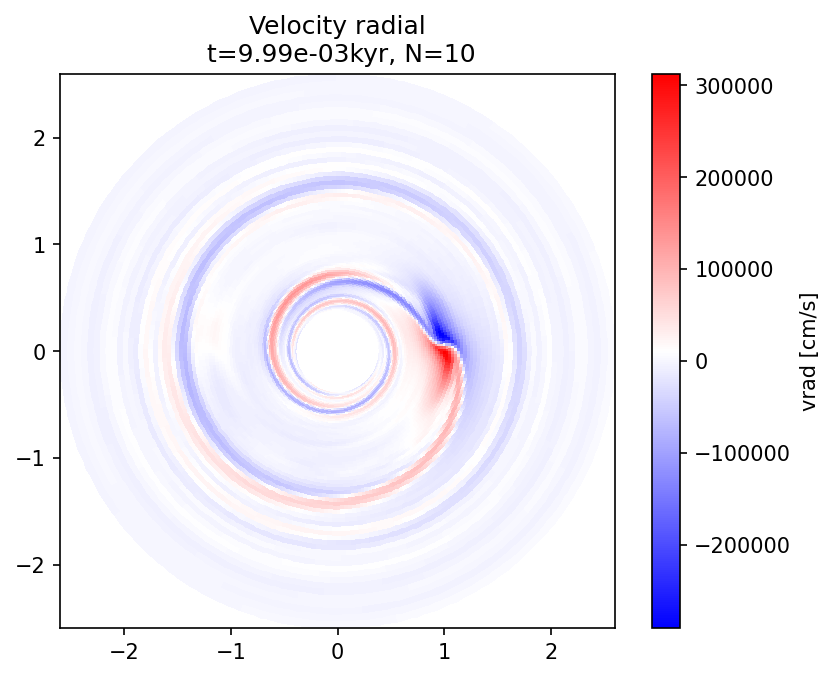

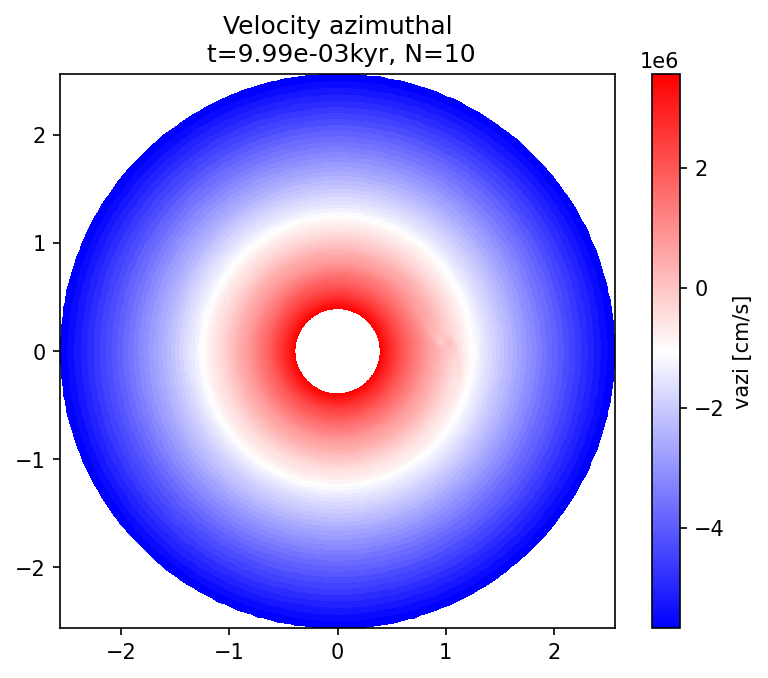

In [3]:
from fargocpt import Loader
l = Loader("output/out/")
Nlast = l.snapshots[-1]
plot_field(l, "Sigma", Nlast, dataunit="g/cm2", cmap="magma", title="Sigma");
plot_field(l, "vrad", Nlast, dataunit="cm/s", cmap="bwr", title="Velocity radial");
plot_field(l, "vazi", Nlast, dataunit="cm/s", cmap="bwr", title="Velocity azimuthal");

## Using the overview widget

We can also use the overview widget.
Just remove the `rphi` in the variable descriptions as done below.

In [5]:
import sys
sys.path.append(repo_root+"/Tools")
from overview import Overview

Run the next cell again to refresh the snapshot list.

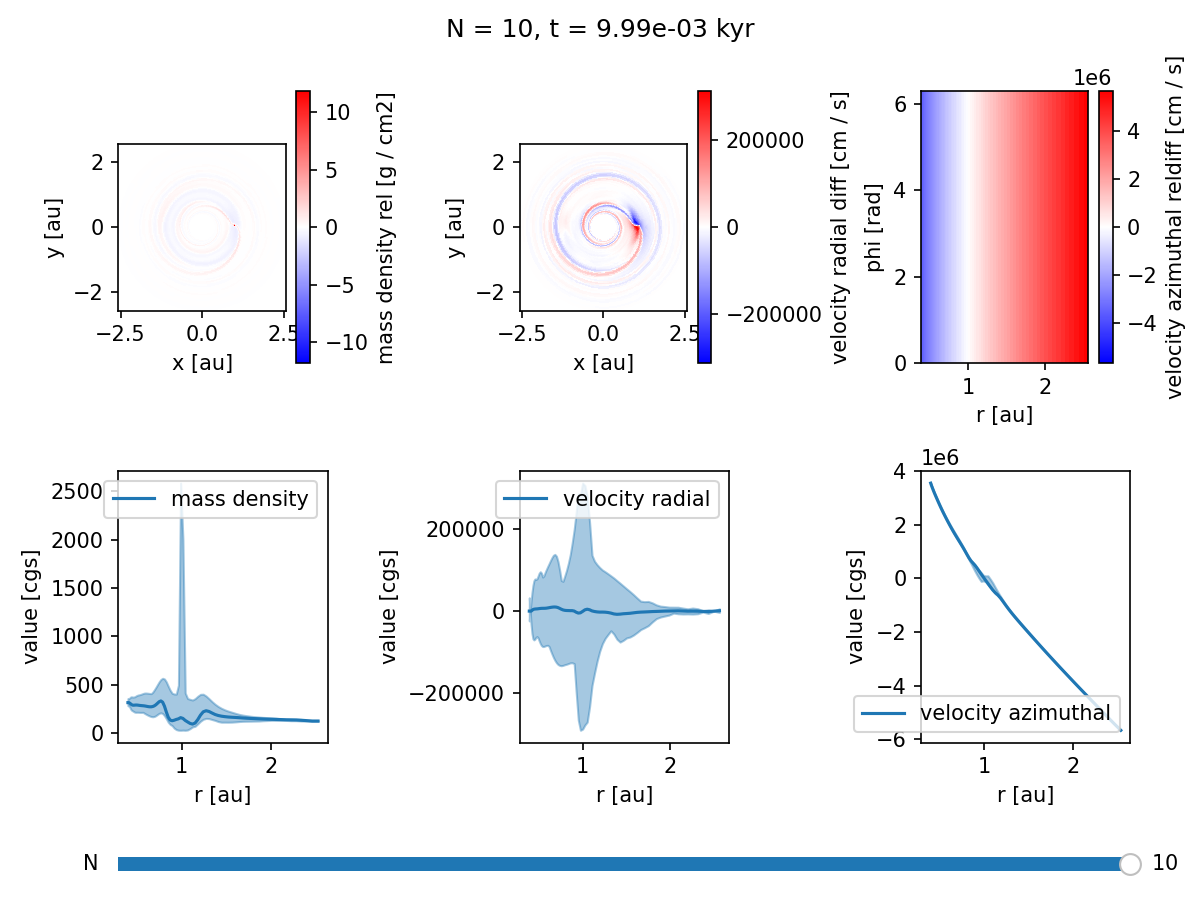

In [6]:
%matplotlib widget
overview = Overview("output/out/", 
                    vars=["2:mass density:rel",
                          "2:velocity radial:diff",
                          "2:velocity azimuthal:reldiff,rphi",
                          "1:mass density:minmax",
                          "1:velocity radial:minmax",
                          "1:velocity azimuthal:minmax"])
overview.create();